# 0. Introduction

**Dataset**  
* [abalone(전복)](https://github.com/MyungKyuYi/AI-class/blob/main/abalone.csv)

**Environment**
* macOS `x86`cpu

**Framework**  
* TensorFlow: Version `2.10.0`

**Dependencies**  
* Python: Version `3.9.19`
* Numpy: Version `1.24.3`
* Pandas: Version `2.2.2`
* Matplotlib: Version `3.9.2`
* scikit-learn: Version `1.2.2`

**Purpose**  
* 전복 데이터를 가지고, 머신러닝 ~분류~, 회귀 / 신경망 ~분류~, 회귀를 각각 수행하라. 레이블은 둘다 Ring

# 1. Load dataset & ML

In [1]:
# import default libraries for ML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# load and represent the dataset
df = pd.read_csv("./datasets/abalone.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
# dataset의 shape, columns 확인
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns}")

# 해당 dataset은 column의 수가 많지 않지만, 수십 개의 columns가 존재하는 경우라면,
# df나 df.describe()로 한 눈에 확인하기 어려움

Shape: (4177, 10)
Columns: Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')


In [4]:
# missing value를 확인하는 방법 두 가지
# sol1. DataFrame.info()는 Non-Null Count & Dtype을 리턴함
print(df.info())
print("\n\n")
# sol2. DataFrame.isnull().sum()은 Null Count를 리턴함 -> Null 확인에는 더 직관적임
print(df.isnull().sum())
print("\n\n")

# 또한 이를 응용하여 dataset 전체에 null이 존재하는지 여부를 출력하는 if statement를 작성 가능
if (df.isnull().sum().sum() == 0): print("There are no missing values.")
print("\n\n")

# 또한 이를 응용하여 null이 존재한다면 자동으로 처리하는 if statement를 작성 가능
# 해당 예제에서는 missing value를 '제거'하도록 작성함. 이외에도 missing value 처리 방법은 다양함
if (df.isnull().sum().sum() == 0):
    print("There are no missing values.")
else:
    print("missing values가 존재하여 처리합니다. \n처리 방법: 삭제")
    df = df.dropna()

# 해당 dataset에는 missing value가 존재하지 않기 때문에 별도로 작동하지는 않음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          4177 non-null   float64
 3   Diameter        4177 non-null   float64
 4   Height          4177 non-null   float64
 5   Whole_weight    4177 non-null   float64
 6   Shucked_weight  4177 non-null   float64
 7   Viscera_weight  4177 non-null   float64
 8   Shell_weight    4177 non-null   float64
 9   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB
None



id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64



There are no missing values.



There are no missing values.


In [5]:
# DataFrame.describe()는 dataset에 대한 statistical values를 제공함
df.describe()

,id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,2088.000000,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,1205.940366,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1044.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,2088.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,3132.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,4176.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [7]:
# columns description
'''
| Sex               | 
| Length            | 
| Diameter          | 
| Height            | 
| Whole_weight      | 
| Shucked_weight    | 
| Viscera_weight    | 
| Shell_weight      |
| Rings(Label)      | 
'''

'\n| Sex               | \n| Length            | \n| Diameter          | \n| Height            | \n| Whole_weight      | \n| Shucked_weight    | \n| Viscera_weight    | \n| Shell_weight      |\n| Rings(Label)      | \n'

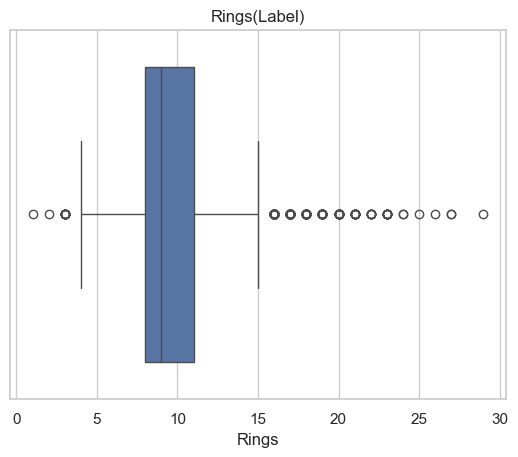

In [8]:
# Label의 분포 확인하기
# Classification의 경우에는 각 class의 count를 확인하면 되지만,
# Regression의 경우 label이 continuous하기 때문에 그 분포를 그래프로 그려 확인
sns.set_theme(style='whitegrid')
sns.boxplot(x='Rings', data=df)
plt.title('Rings(Label)')
plt.show()

In [9]:
# Sex에 대해서 missing value도 없음을 확인했으니 numeric하게 바꾸자

# categorical value를 각각 int에 mapping
np.unique(df['Sex']) # prints 'F', 'I', 'M'
sex_mapping = {'M': 0, 'F': 1, 'I': 2} # I는 성별을 구분할 수 없는 '유아기'를 의미함
df['Sex'] = df['Sex'].map(sex_mapping)

df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


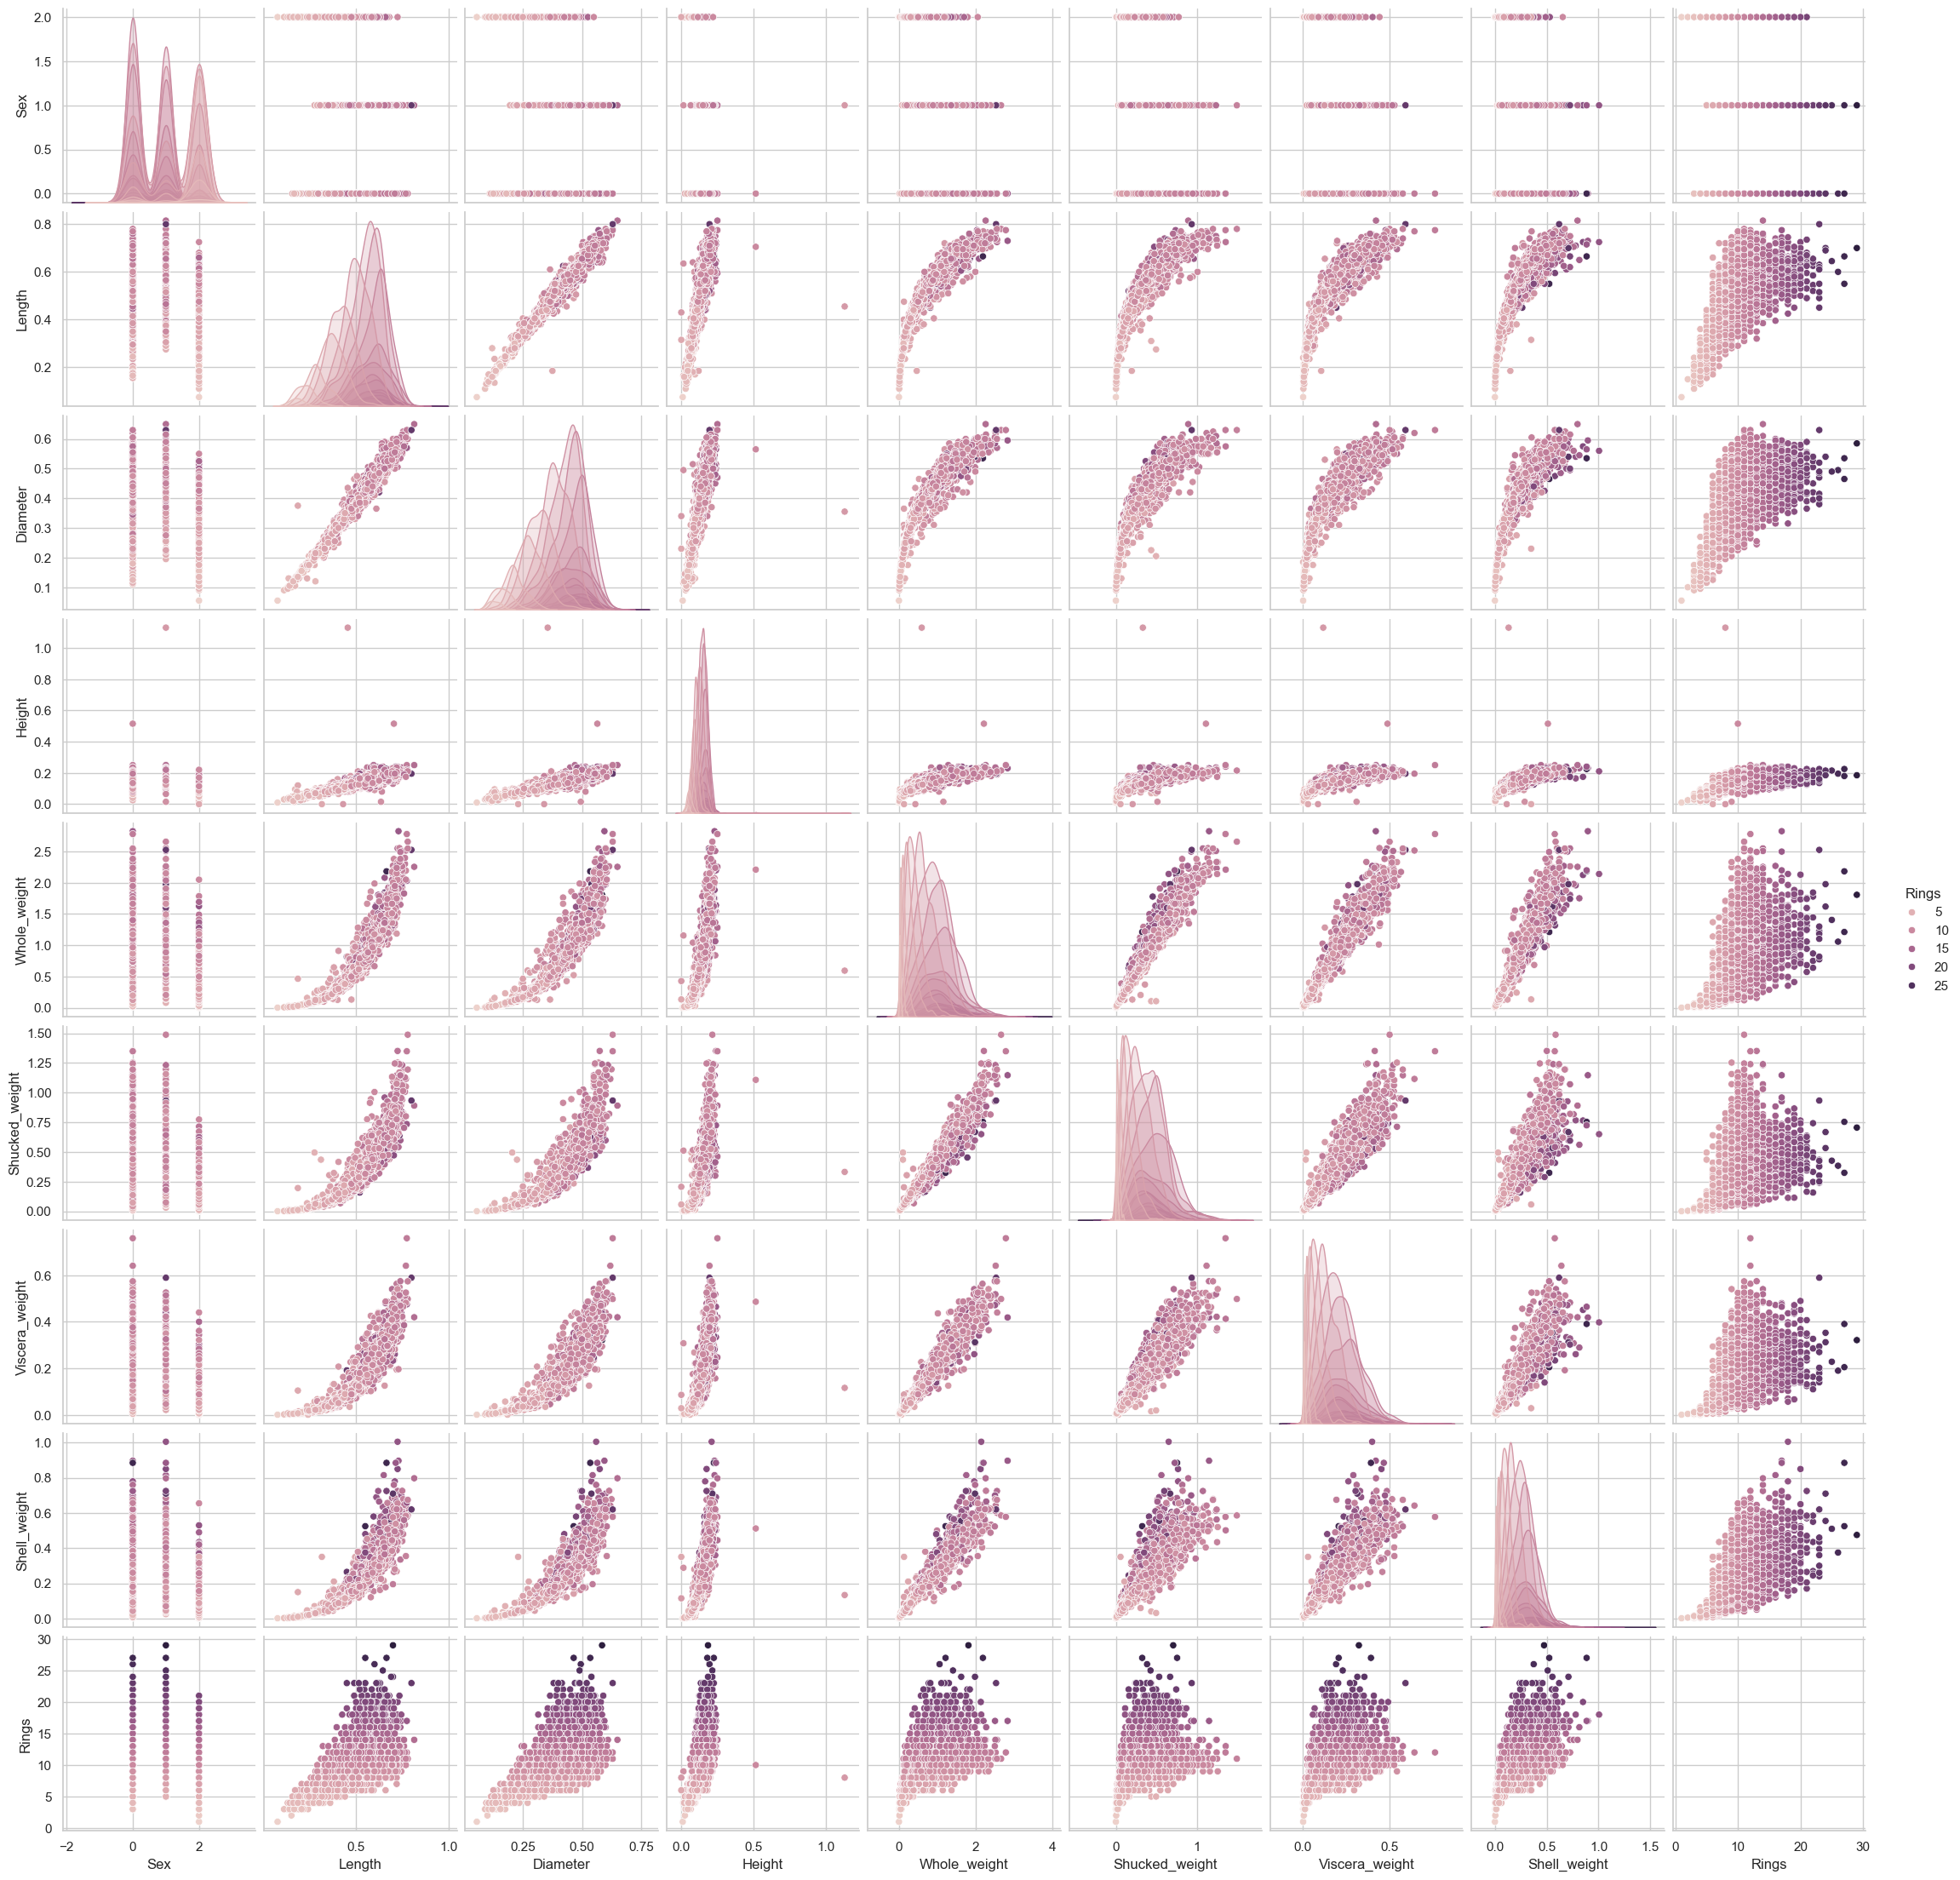

In [10]:
# Check the correlations(2) by pairplot
sns.pairplot(data=df,
             vars=['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
                   'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
             hue='Rings')
plt.show()

## 1.1. K-NN Classification

In [11]:
# 1. Split the dataset into features(X) and label(y)
# 2. convert pandas-DataFrame to numpy-ndarray
X = df.drop(['id', 'Sex', 'Rings'], axis=1).to_numpy() # 'Sex'도 일단 빼버리겠음
y = df['Rings'].to_numpy()

print(f"X is {type(X)}, y is {type(y)} \n")
print(f"X.head \n{X[:5]} \n")
print(f"y.head \n{y[:5]} \n")

X is <class 'numpy.ndarray'>, y is <class 'numpy.ndarray'> 

X.head 
[[0.455  0.365  0.095  0.514  0.2245 0.101  0.15  ]
 [0.35   0.265  0.09   0.2255 0.0995 0.0485 0.07  ]
 [0.53   0.42   0.135  0.677  0.2565 0.1415 0.21  ]
 [0.44   0.365  0.125  0.516  0.2155 0.114  0.155 ]
 [0.33   0.255  0.08   0.205  0.0895 0.0395 0.055 ]] 

y.head 
[15  7  9 10  7] 



In [12]:
# Split the dataset into train_set and test_set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)
print(f"X_train: Shape {X_train.shape} \nX_test:  Shape {X_test.shape}")
print(f"y_train: Shape {y_train.shape} \ny_test:  Shape {y_test.shape}")

X_train: Shape (3341, 7) 
X_test:  Shape (836, 7)
y_train: Shape (3341,) 
y_test:  Shape (836,)


In [13]:
# Standardize the features scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train.head \n{X_train[:5]} \n")
print(f"X_train_scaled.head \n{X_train_scaled[:5]}")

X_train.head 
[[0.55   0.445  0.125  0.672  0.288  0.1365 0.21  ]
 [0.475  0.355  0.1    0.5035 0.2535 0.091  0.14  ]
 [0.305  0.225  0.07   0.1485 0.0585 0.0335 0.045 ]
 [0.275  0.2    0.065  0.1165 0.0565 0.013  0.035 ]
 [0.495  0.38   0.135  0.6295 0.263  0.1425 0.215 ]] 

X_train_scaled.head 
[[ 0.21017452  0.36972535 -0.34795017 -0.32316418 -0.32540694 -0.40512998
  -0.21213236]
 [-0.41944448 -0.5423862  -0.93608206 -0.66598541 -0.48012641 -0.82093157
  -0.71241871]
 [-1.84658088 -1.85988065 -1.64184034 -1.3882497  -1.35462776 -1.34639511
  -1.39137875]
 [-2.09842848 -2.11324497 -1.75946671 -1.45335522 -1.36359701 -1.53373429
  -1.46284823]
 [-0.25154608 -0.28902188 -0.11269741 -0.40963244 -0.43752249 -0.350299
  -0.17639762]]


In [14]:
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor()
kn.fit(X_train_scaled, y_train)
r_squared_train = kn.score(X_train_scaled, y_train)
r_squared_test = kn.score(X_test_scaled, y_test)

print(f"R-squared-train: {r_squared_train}")
print(f"R-squared-test : {r_squared_test}")

R-squared-train: 0.6586931151069628
R-squared-test : 0.47049437883837786


In [15]:
# MSE 계산
from sklearn.metrics import mean_squared_error

y_preds = kn.predict(X_test_scaled) # predicted value for data instances

# How to get the MSE - sol1. scikit-learn library 사용
print(f"sol1. MSE: {mean_squared_error(y_preds, y_test)}")

# How to get the MSE - sol2. numpy만 사용하여 직접 계산
def mse_np(predicted, actual):
    return np.mean((np.array(predicted) - np.array(actual)) ** 2)
print(f"sol2. MSE: {mse_np(y_preds, y_test)}")

# How to get the MSE - sol3. python만 사용하여 직접 계산
def mse_py(predicted, actual):
    # numpy를 사용하면 broadcasting 기능 덕분에 아래 2 lines가 내부적으로 수행되는 것 뿐임.
    sum_squared_error = sum((p - a) ** 2 for p, a in zip(predicted, actual))
    mean_squared_error = sum_squared_error / len(actual)
    return mean_squared_error
print(f"sol3. MSE: {mse_py(y_preds, y_test)}")

# X_test_scaled datainstance들을 Linear regression model에 넣었을 때의 예측값 확인
print(f"\ny_preds.head: \n{np.round(y_preds[:10], 2)}")
print(f"\ny_actual.head: \n{y_test[:10]}")
print(f"\nMSE.head: \n{((np.array(y_preds) - np.array(y_test)) ** 2)[:10]}")

sol1. MSE: 5.732009569377991
sol2. MSE: 5.732009569377991
sol3. MSE: 5.732009569377985

y_preds.head: 
[10.6  8.8 14.4 10.8 14.   8.8  8.4  8.   6.2 12. ]

y_actual.head: 
[ 9  8 16  9 14 11  7  6  7 10]

MSE.head: 
[2.56 0.64 2.56 3.24 0.   4.84 1.96 4.   0.64 4.  ]


## 1.2. Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
r_squared_train = lr.score(X_train_scaled, y_train)
r_squared_test = lr.score(X_test_scaled, y_test)

print(f"R-squared-train: {r_squared_train}")
print(f"R-squared-test : {r_squared_test}")

# Linear regression은 기본적으로 R-squared 즉, Coefficient of determination을 리턴한다.
# 하지만 이는 직관성이 부족하므로 관례적으로 MSE를 performance 측정에 사용한다(다음 cell).

R-squared-train: 0.5260176935365598
R-squared-test : 0.5329844757724522


In [17]:
# MSE 계산
from sklearn.metrics import mean_squared_error

y_preds = lr.predict(X_test_scaled) # predicted value for data instances

# How to get the MSE - sol1. scikit-learn library 사용
print(f"sol1. MSE: {mean_squared_error(y_preds, y_test)}")

# How to get the MSE - sol2. numpy만 사용하여 직접 계산
def mse_np(predicted, actual):
    return np.mean((np.array(predicted) - np.array(actual)) ** 2)
print(f"sol2. MSE: {mse_np(y_preds, y_test)}")

# How to get the MSE - sol3. python만 사용하여 직접 계산
def mse_py(predicted, actual):
    # numpy를 사용하면 broadcasting 기능 덕분에 아래 2 lines가 내부적으로 수행되는 것 뿐임.
    sum_squared_error = sum((p - a) ** 2 for p, a in zip(predicted, actual))
    mean_squared_error = sum_squared_error / len(actual)
    return mean_squared_error
print(f"sol3. MSE: {mse_py(y_preds, y_test)}")

# X_test_scaled datainstance들을 Linear regression model에 넣었을 때의 예측값 확인
print(f"\ny_preds.head: \n{np.round(y_preds[:10], 2)}")
print(f"\ny_actual.head: \n{y_test[:10]}")
print(f"\nMSE.head: \n{((np.array(y_preds) - np.array(y_test)) ** 2)[:10]}")

sol1. MSE: 5.055541144299382
sol2. MSE: 5.055541144299382
sol3. MSE: 5.055541144299385

y_preds.head: 
[11.6   9.97 13.97 11.95 10.83 10.65  9.83  8.75  7.45 10.7 ]

y_actual.head: 
[ 9  8 16  9 14 11  7  6  7 10]

MSE.head: 
[ 6.76596169  3.869935    4.13018967  8.73009832 10.07745611  0.12389907
  8.02472606  7.54062159  0.20270069  0.48811854]


## 1.3. Decision Tree
DT의 경우에는 features에 대해서 scale standardization을 하지 않아도 된다.  
또한 오히려 하지 않는 편이 인간이 model을 파악하기에 유용하다.

In [18]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5,
                           random_state=42)
dt.fit(X_train, y_train)
r_squared_train = dt.score(X_train, y_train)
r_squared_test = dt.score(X_test, y_test)

print(f"R-squared-train: {r_squared_train}")
print(f"R-squared-test : {r_squared_test}")

R-squared-train: 0.5445430674354181
R-squared-test : 0.49731518390819296


In [19]:
y_preds = dt.predict(X_test)
print(f"MSE: {mean_squared_error(y_preds, y_test)}")

MSE: 5.441668720906287


## 1.4. Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=3,
                           random_state=42)
rf.fit(X_train, y_train)
r_squared_train = rf.score(X_train, y_train)
r_squared_test = rf.score(X_test, y_test)

print(f"R-squared-train: {r_squared_train}")
print(f"R-squared-test : {r_squared_test}")

R-squared-train: 0.4640927411843081
R-squared-test : 0.4286561767872885


In [21]:
y_preds = rf.predict(X_test)
print(f"MSE: {mean_squared_error(y_preds, y_test)}")

MSE: 6.18491689450951


## 1.5. Support Vector Machine

In [22]:
from sklearn.svm import SVR # Support Vector Regressor

svr = SVR(kernel='linear', C=1.0)
svr.fit(X_train, y_train)
r_squared_train = svr.score(X_train, y_train)
r_squared_test = svr.score(X_test, y_test)

print(f"R-squared-train: {r_squared_train}")
print(f"R-squared-test : {r_squared_test}")

R-squared-train: 0.47020183147427186
R-squared-test : 0.4807126442464936


In [23]:
y_preds = svr.predict(X_test)
print(f"MSE: {mean_squared_error(y_preds, y_test)}")

MSE: 5.621394700033882


# 2. DL_dense layer only

In [24]:
import tensorflow as tf
from tensorflow import keras

2024-09-19 00:31:02.980283: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
# Create the model
model = keras.models.Sequential()

# Add layers
model.add(keras.layers.Dense(units=32,
                             activation='ReLU',
                             name='dense1',
                             input_shape=(7,)))
model.add(keras.layers.Dense(units=64,
                             activation='ReLU',
                             name='dense2'))
## regression에서는 output layer에 activate하지 않음
model.add(keras.layers.Dense(units=1,
                             name='output'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 32)                256       
                                                                 
 dense2 (Dense)              (None, 64)                2112      
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________


2024-09-19 00:31:06.927987: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
from keras.optimizers import Adam
import absl.logging
absl.logging.set_verbosity('error')  # absl의 경고 수준을 에러로만 제한

# Compile the model
model.compile(Adam(learning_rate=0.04), 
              loss='mean_squared_error', 
              metrics=['mean_squared_error'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dnn-model.kears',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
# history = model.fit(X_train_scaled, y_train,
#                     validation_split=0.2,
#                     batch_size=None,
#                     verbose=2,
#                     epochs=50,
#                     callbacks=[checkpoint_cb, early_stopping_cb])

history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    batch_size=None,
                    verbose=2,
                    epochs=50)

Epoch 1/50
84/84 - 1s - loss: 14.4532 - mean_squared_error: 14.4532 - val_loss: 7.1275 - val_mean_squared_error: 7.1275 - 502ms/epoch - 6ms/step
Epoch 2/50
84/84 - 0s - loss: 5.9924 - mean_squared_error: 5.9924 - val_loss: 4.3373 - val_mean_squared_error: 4.3373 - 95ms/epoch - 1ms/step
Epoch 3/50
84/84 - 0s - loss: 5.1552 - mean_squared_error: 5.1552 - val_loss: 4.8967 - val_mean_squared_error: 4.8967 - 100ms/epoch - 1ms/step
Epoch 4/50
84/84 - 0s - loss: 5.2169 - mean_squared_error: 5.2169 - val_loss: 4.4889 - val_mean_squared_error: 4.4889 - 94ms/epoch - 1ms/step
Epoch 5/50
84/84 - 0s - loss: 5.2021 - mean_squared_error: 5.2021 - val_loss: 5.1033 - val_mean_squared_error: 5.1033 - 98ms/epoch - 1ms/step
Epoch 6/50
84/84 - 0s - loss: 4.9607 - mean_squared_error: 4.9607 - val_loss: 4.4802 - val_mean_squared_error: 4.4802 - 99ms/epoch - 1ms/step
Epoch 7/50
84/84 - 0s - loss: 5.1106 - mean_squared_error: 5.1106 - val_loss: 4.1800 - val_mean_squared_error: 4.1800 - 94ms/epoch - 1ms/step
Ep

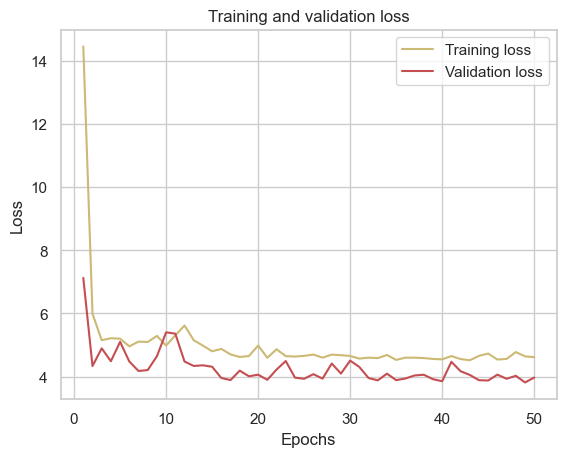

In [27]:
# Epoch에 따른 loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

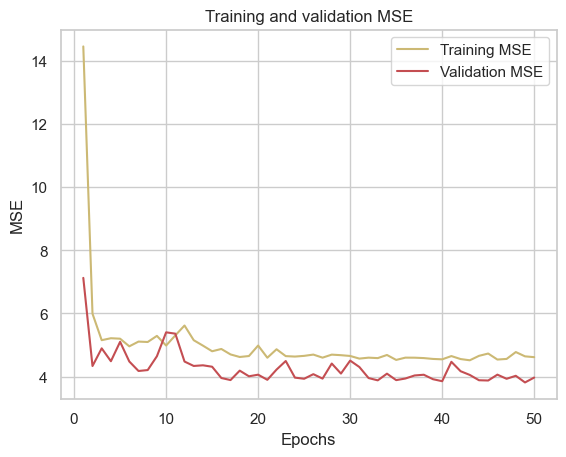

In [28]:
# Epoch에 따른 MSE
acc = history.history['mean_squared_error']
val_acc = history.history['val_mean_squared_error']
plt.plot(epochs, acc, 'y', label='Training MSE')
plt.plot(epochs, val_acc, 'r', label='Validation MSE')
plt.title('Training and validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [29]:
y_preds = model(X_test_scaled)
print(f"MSE: {mean_squared_error(y_preds, y_test)}")

MSE: 4.607741105682976


In [30]:
# output 확인
y_preds[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[11.506348 ],
       [ 9.49027  ],
       [16.64772  ],
       [11.359001 ],
       [13.74708  ],
       [11.818989 ],
       [ 9.705237 ],
       [ 8.795729 ],
       [ 7.5739303],
       [10.616789 ]], dtype=float32)>